In [1]:
import os
os.getcwd()

'C:\\Users\\nibaf\\OneDrive\\Desktop\\capstone'

In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
import os
import re
from IPython.display import Audio
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np


rng = np.random.default_rng()

wavefile_folder="snippets4_3//"
L=os.listdir(wavefile_folder)
L=[x for x in L if re.search("wav",x)]
print(len(L))

675


In [3]:
# def temp(x):
    
#     xabsposmin=np.min(xabs[xabs>0])
#     pd.Series(np.log(xabsposmin+np.abs(x))).hist(bins=200)
#     y=np.log(xabsposmin+np.abs(x))
#     quant=pd.Series(y).quantile([i/20 for i in range(1,20)])
#     print(quant)
#     for i in range(19):
#         lst.append(quant.iloc[i])
#     print(lst)
#     winsize=int(len(x)/20)
#     print(winsize)
#     print('lst',lst)
#     lst2=[]
#     c=3000
#     N=int(len(rollmean)/100-30)
#     for i in range(99):
#         i+=1
#         lst2.append(rollmean[c])
#         c=c+N
#     print(len(lst2))
#     lstconc=np.concatenate((lst,lst2))
#     return lstconc

In [13]:
#extract features
def features(n):
    fileid=wavefile_folder+L[n]
    lst=[]
    lstconc2=[]
    print(fileid)
    lst.append(fileid)
    x,samplerate=sf.read(fileid)
    plt.plot(x)
    plt.show()
    lst.append(len(x))
#     print('lenX',len(x))
    xabs=np.abs(x)
    xabsN=xabs/np.max(xabs)
    print('XabsNplot')
    plt.plot(xabsN)
    plt.show()
    lst.append(np.mean(xabsN))
    lst.append(np.var(xabsN))
    xabsposmin=np.min(xabsN[xabsN>0])
    print('np.log(xabsposmin+xabsN)).hist(bins=200)plot')
    pd.Series(np.log(xabsposmin+xabsN)).hist(bins=200)
    plt.show()
    y=np.log(xabsposmin+np.abs(x))
    quant=pd.Series(y).quantile([i/20 for i in range(1,20)])
#     print(quant)
    for i in range(19):
        lst.append(quant.iloc[i])
#     print('lenlst',len(lst))
    winsize=int(len(x)/20)
    print(winsize,'winsize')
    #lst2 include rolling mean selection
    rollmean=pd.Series(xabsN).rolling(winsize).mean()
    lst2=[] 
    col=[]
    rollmean2=rollmean.dropna()
    print('rollmean')
    plt.plot(rollmean2)
    plt.show()
    N=int(len(rollmean2)/100)
    c=0
    for i in range(100):
        i+=1
        lst2.append(rollmean2.iloc[c])
        c=c+N
        col.append(str(i)+'rm')

#     print(col,'col')
#     print(len(lst2))
    lstconc=np.concatenate((lst,lst2))
    
#     lstconc=temp(x)
   
    #FT
    lstft=[]
    rate, data = wav.read(wavefile_folder+L[n])
    fft_out = fft(data)
    print('abs(fft_out)')
    plt.plot(np.abs(fft_out))
    plt.show()
    ftabs=np.abs(fft_out)
    imax=int(8000*len(fft_out)/44000)
    ftabsN=ftabs/np.max(ftabs)
    ftabsNi=ftabsN[:imax]
    lstft.append(np.mean(ftabsNi))
    lstft.append(np.var(ftabsNi))
    
    ftabsposmin=np.min(ftabsNi[ftabsNi>0])
    print('FT hist')
    pd.Series(np.log(ftabsposmin+ftabsN)).hist(bins=200)
    plt.show()
    # FT features
    yft=np.log(ftabsposmin+ftabsNi)
    quantft=pd.Series(yft).quantile([i/20 for i in range(1,20)])
#     print(quant)
    for i in range(19):
        lstft.append(quantft.iloc[i])
#     print('lstft',lstft)
    winsize=int(len(ftabsNi)/20)
#     print(winsize)
    #lst2 include rolling mean selection
    rollmeanft=pd.Series(ftabsNi).rolling(winsize).mean()
    lst2ft=[]
    colft=[]
    rollmeanft2=rollmeanft.dropna()
    print('rollmeanft')
    plt.plot(rollmeanft2)
    plt.show()
    N=int(len(rollmeanft2)/100)
    c=0
    for i in range(100):
        i+=1
        lst2ft.append(rollmeanft2.iloc[c])
        c=c+N
        colft.append(str(i)+'ftrm')
    
    lstconcft=np.concatenate((lstft,lst2ft))
    #combine features from before FT and after FT
    features=np.concatenate((lstconc,lstconcft))
    
    return features,col,colft
    
    
    

In [14]:
# f,col,colft=features(50)

In [15]:
# print(len(f))

snippets4_3//snippet_Amitabh2000.wav


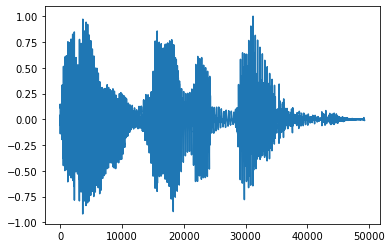

XabsNplot


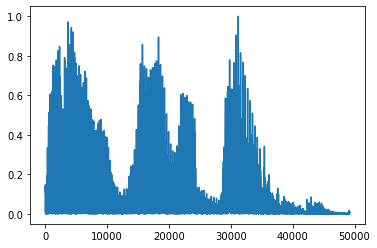

np.log(xabsposmin+xabsN)).hist(bins=200)plot


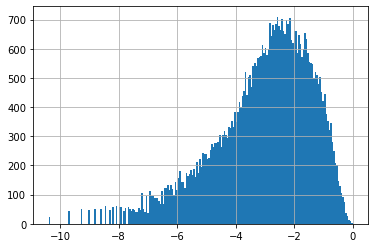

2461 winsize
rollmean


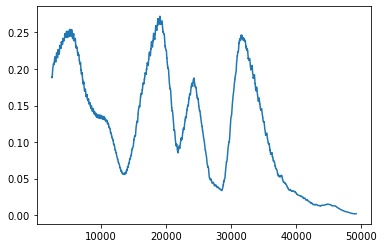

abs(fft_out)


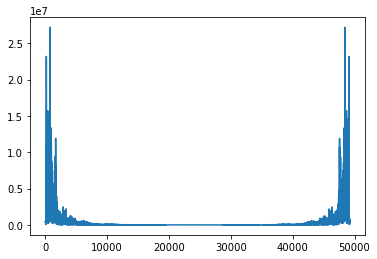

FT hist


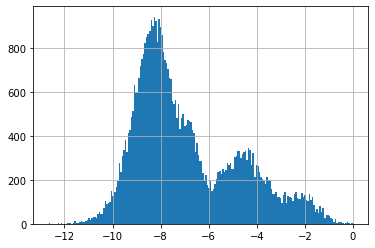

rollmeanft


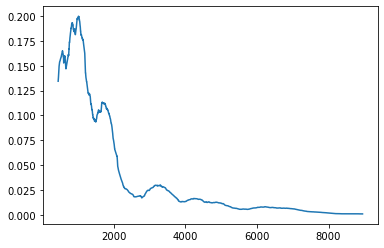

snippets4_3//snippet_Amitabh2001.wav


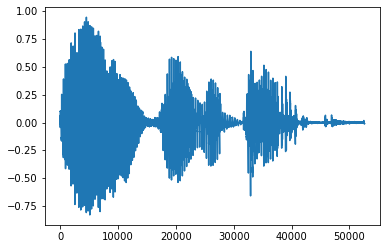

XabsNplot


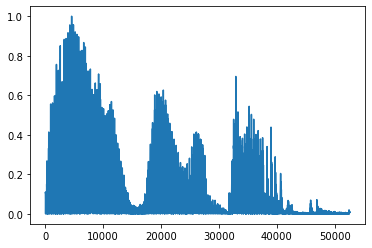

np.log(xabsposmin+xabsN)).hist(bins=200)plot


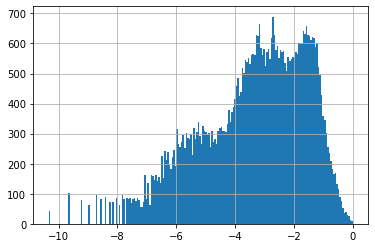

2630 winsize
rollmean


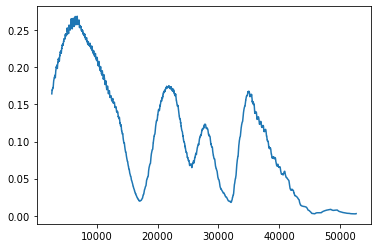

abs(fft_out)


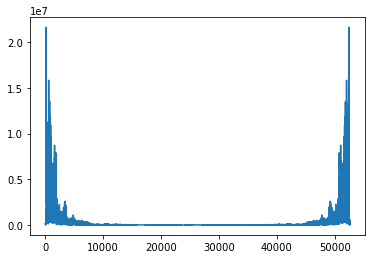

FT hist


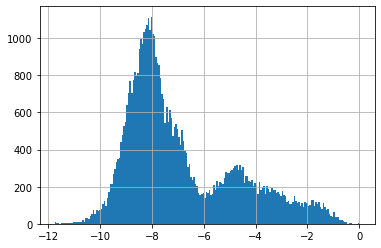

rollmeanft


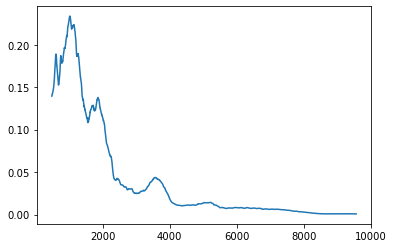

snippets4_3//snippet_Amitabh2002.wav


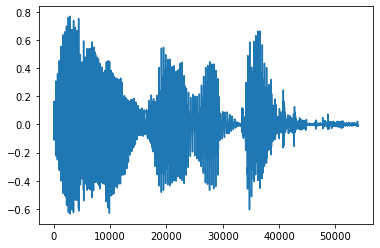

XabsNplot


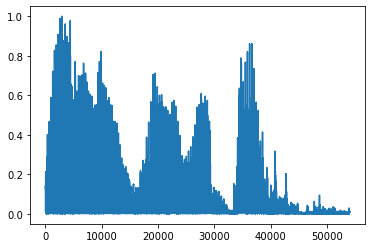

np.log(xabsposmin+xabsN)).hist(bins=200)plot


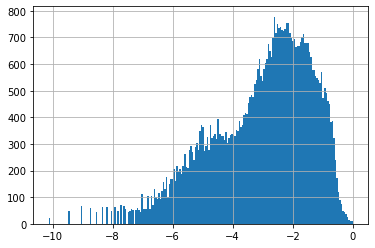

2702 winsize
rollmean


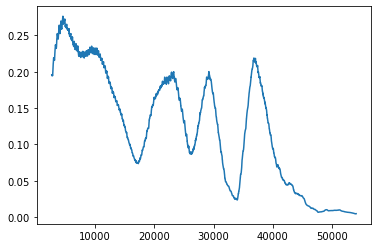

abs(fft_out)


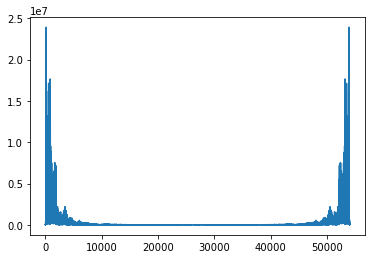

FT hist


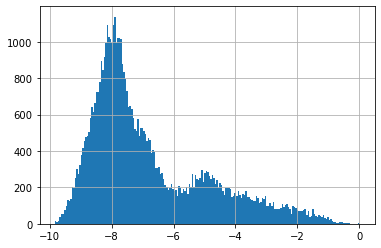

rollmeanft


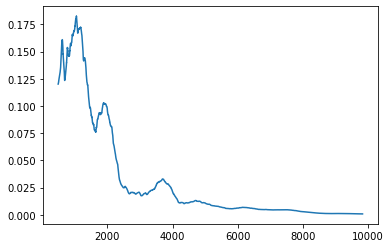

snippets4_3//snippet_Amitabh2003.wav


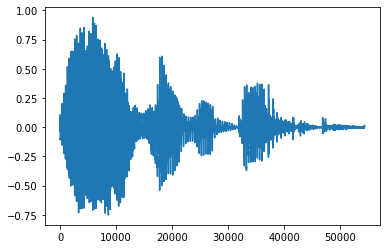

XabsNplot


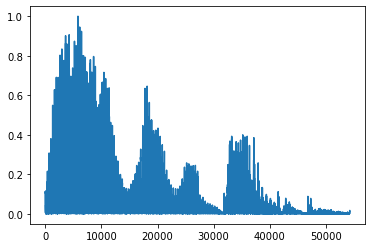

np.log(xabsposmin+xabsN)).hist(bins=200)plot


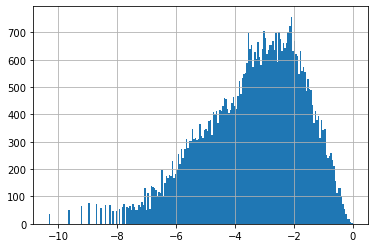

2714 winsize
rollmean


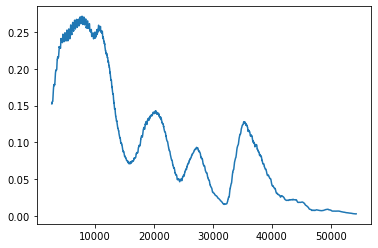

abs(fft_out)


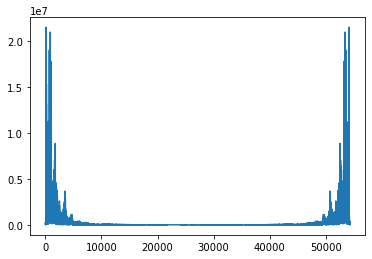

FT hist


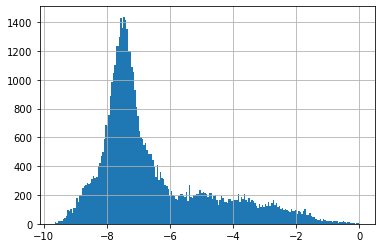

rollmeanft


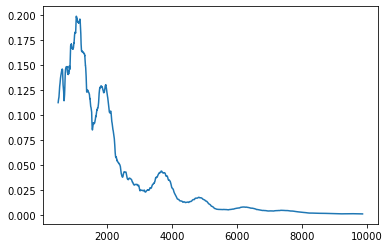

snippets4_3//snippet_Amitabh2004.wav


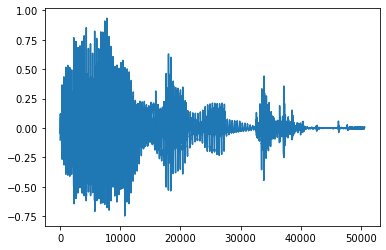

XabsNplot


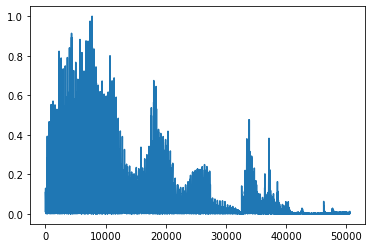

np.log(xabsposmin+xabsN)).hist(bins=200)plot


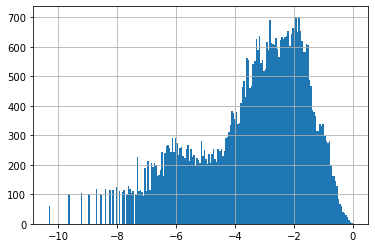

2530 winsize
rollmean


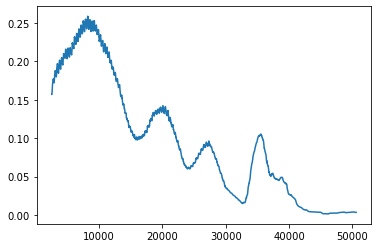

abs(fft_out)


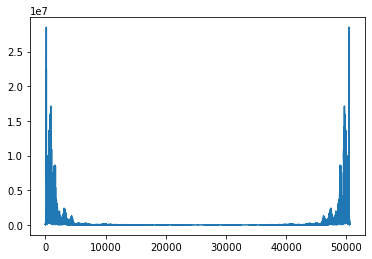

FT hist


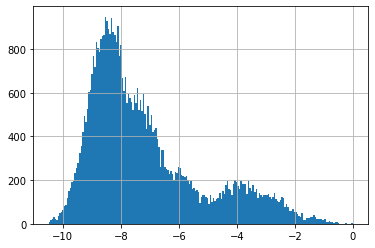

rollmeanft


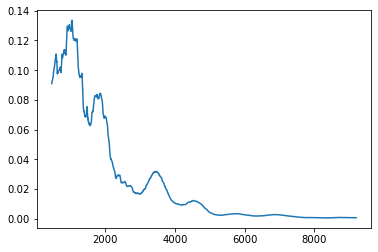

In [16]:
#loop through all the clips
LST=[]
for n in range(len(L)):
    f,col,colft=features(n)
    #name the columns
    columns1=['ID','length','mean(absx)','var(absx)','.05 perc of np.log(xabsposmin+np.abs(x))','.1','.15','.2', '.25', '.3', '.35','.4', '.45', '.5','.55','.6','.65','.7','.75', '.8','.85','.9','.95']
    columns=np.concatenate((columns1,col))
    columnsft1=['mean(ftabs)','var(ftabs)','.05 perc of np.log(ftabsposmin+ftabs)','.1ft','.15ft','.2ft', '.25ft', '.3ft', '.35ft','.4ft', '.45ft', '.5ft','.55ft','.6ft','.65ft','.7ft','.75ft', '.8ft','.85ft','.9ft','.95ft']
    columnsft=np.concatenate((columnsft1,colft))
    columns_tot=np.concatenate((columns,columnsft))
    LST.append(f)
    if n>3:
        break

In [6]:
print(len(LST))

675


In [7]:

df = pd.DataFrame(LST, columns=columns_tot)

In [8]:
df

,ID,length,mean(absx),var(absx),.05 perc of np.log(xabsposmin+np.abs(x)),.1,.15,.2,.25,.3,...,91ftrm,92ftrm,93ftrm,94ftrm,95ftrm,96ftrm,97ftrm,98ftrm,99ftrm,100ftrm
0,snippets4_3//snippet_Amitabh2000.wav,49229,0.11551983381335258,0.019733845620441323,-6.408222531485881,-5.5068581212385705,-4.891064564403101,-4.428499992304154,-4.034179499619269,-3.7163529530231685,...,0.0014828881259299647,0.0012742547849443667,0.0012563875244404408,0.0011321073709318382,0.0010962240646062145,0.001114468709563388,0.0011587068445952902,0.0010900241840652964,0.001093365795763609,0.0010475989343023558
1,snippets4_3//snippet_Amitabh2001.wav,52616,0.09956945355150694,0.0170158383087584,-6.869160152703882,-6.119744581145728,-5.626036698279165,-5.160460433313857,-4.6932338938257425,-4.263685145027172,...,0.0009026608235927812,0.0008144613645535927,0.0007962498022695998,0.0008632363740046186,0.0009293879947522527,0.0009395689552443163,0.0009876011794951833,0.001005901280673985,0.0009546091557811566,0.0009052458070009804
2,snippets4_3//snippet_Amitabh2002.wav,54045,0.11958224628544585,0.020010588893030614,-6.47915007582325,-5.759544741026793,-5.2894297109014135,-4.862622714771632,-4.45887329002226,-4.049288615321478,...,0.0011224270574523752,0.0011169978843100633,0.0011661514651110732,0.0011047898117986135,0.0010880467766084482,0.0010567441015040318,0.001049282266364773,0.0009291201626921211,0.0008698312643450684,0.0008364551307700138
3,snippets4_3//snippet_Amitabh2003.wav,54298,0.0931238085856291,0.016129438128570383,-6.5891806110941875,-5.842684191625935,-5.372922997823685,-4.954524019155097,-4.585882752534558,-4.259347943342797,...,0.001251724703119767,0.0011242056258281695,0.001050563484921393,0.0010152263791953328,0.0009845019369127358,0.001049111972046371,0.0010748869322429917,0.0010949765003650858,0.0010957848676432993,0.0010641421369327743
4,snippets4_3//snippet_Amitabh2004.wav,50604,0.0932751395818254,0.015163682825926618,-7.216206157135724,-6.4639938304548314,-5.965547816568152,-5.4269025182017465,-4.843973550039855,-4.314827053859271,...,0.0005892327729306416,0.0005518697536621985,0.000622236457728419,0.0007124059640364866,0.0007836740618346518,0.0008419270772705248,0.0008423077710083166,0.0007863906750132117,0.0007145112692520727,0.000695800531338238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,snippets4_3//snippet_Zachary2040.wav,38994,0.1081228690124368,0.019587527729874498,-6.655378421935038,-5.976260045766862,-5.405584878352899,-4.87105752264908,-4.443509750383847,-4.125888386248461,...,0.0026247256816348055,0.0025356093744951713,0.0024442147417203246,0.0023966713895175306,0.002177837309682661,0.002094982358875186,0.0020463260675424523,0.002040257001908534,0.0020423214677558303,0.0021406571227382066
671,snippets4_3//snippet_Zachary2041.wav,42623,0.11328182890342693,0.021809966121176565,-6.956018860050268,-6.2826675114782695,-5.760305774184127,-5.18649795047893,-4.692678656567827,-4.3076548967130694,...,0.002986798557921627,0.0028823969679820857,0.00271248525510412,0.002600472949671749,0.0026924349219532755,0.0024699650335522493,0.002357398847566799,0.0022539840557281926,0.0021910208589736185,0.00220393130882842
672,snippets4_3//snippet_Zachary2042.wav,39657,0.10076433020512862,0.016750389804967087,-6.930505818013386,-6.079307326021681,-5.360054304474309,-4.863695987862924,-4.443884048668284,-4.046617346322116,...,0.002874337488087007,0.0031799537491998364,0.0029678465394206125,0.002853019548305275,0.0028262416880256397,0.002837415492574222,0.0027789020400440833,0.0026403252387545975,0.0026404000168017317,0.002573084035790946
673,snippets4_3//snippet_Zachary2043.wav,54251,0.08555257528881458,0.017476651246379604,-7.974899046303261,-7.339823002730821,-6.954489306292686,-6.60685862388422,-6.315073182929723,-6.011788681937832,...,0.0026235017191639644,0.002632956495671113,0.0026945379585553483,0.0026389696835137674,0.0024186992279031294,0.0021542402068349194,0.002049897107969189,0.0020107206448

In [9]:
df.to_csv('out4_3.csv',index=False)

In [ ]:
# fileid=wavefile_folder+L[3]
# lst=[]
# print(fileid)
# lst.append(fileid)
# x,samplerate=sf.read(fileid)
# lst.append(len(x))
# xabs=np.abs(x)
# lst.append(np.mean(xabs))
# lst.append(np.var(xabs))
# xabsposmin=np.min(xabs[xabs>0])
# pd.Series(np.log(xabsposmin+np.abs(x))).hist(bins=200)
# y=np.log(xabsposmin+np.abs(x))
# quant=pd.Series(y).quantile([i/20 for i in range(1,20)])
# print(quant)
# for i in range(19):
#     lst.append(quant.iloc[i])
# print(lst)
# winsize=int(len(x)/20)
# print(winsize)
# lst2=[]
# c=3000
# N=int(len(rollmean)/100-30)
# for i in range(99):
#     i+=1
#     lst2.append(rollmean[c])
#     c=c+N
# print(len(lst2))
# lstconc=np.concatenate((lst,lst2))


#ignore below

print(lstconc)

pd.Series(x).abs().rolling(winsize).mean().plot()

rollmean=pd.Series(x).abs().rolling(winsize).mean()

print(len(rollmean))

print(rollmean[3000])

lst2=[]
c=3000
N=int(len(rollmean)/100-30)
for i in range(99):
    i+=1
    lst2.append(rollmean[c])
    c=c+N

print(lst2)

pd.Series(y).abs().rolling(winsize).mean().plot()

print(L)

#Should we also get the percentile& mean of the actual amplitude percentile?
print(np.percentile(x,25))
print(np.percentile(x,50))
print(np.percentile(x,75))

print(np.mean(x))
print(np.var(x))

#window averaging
wsize=int(len(x)/100) # get the same N window each clip
wsize2=int(len(x)/1000)

def runningMean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

winsize=int(len(x)/20)
print(winsize)
pd.Series(x).abs().rolling(winsize).mean().plot()

run_ave=runningMean(x,wsize)
plt.plot(run_ave)

run_ave=runningMean(x,wsize2)
plt.plot(run_ave)

from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
import os
import re
from IPython.display import Audio
#
# Given a signal x break it up into segments where we think the speaker 
# is speaking.
#
# First, take absolute value and normalize by dividing max value
#
# Repeat the following  
#
#     1) start interval at first value that is above initial_threshold
#     2) end interval at the first value starts at a window of duration wdur seconds
#        has its max below the kill threshold
#
# Remove all intervals whose duration is less than mindur seconds
#
def find_gaps(x,mindur,wdur, initial_threshold, kill_threshold):
    #
    # compute number of indices for mindur and wsecs
    #
    mindur_indices=int(mindur*44100)
    wdur_indices=int(wdur*44100)
    #
    #
    #
    print("mindur_indices = "+str(mindur_indices))
    print("wdur_indices= "+str(wdur_indices))
#     print("xlength = "+str(len(x)))
    
    #
    # normalize the signal
    #
    x=np.abs(x)
    M=np.max(x)
    x=x/M
    xt=x>=initial_threshold
    # print("number of x's above threshold ="+str(xt.sum()))
    #
    # compute indicator of max in windows below threshold
    #
    y=pd.Series(x).rolling(wdur_indices).max()
    y.to_csv("y.csv")
    #
    # remove the initial na's and find whose maximum is below threshold
    #
    y=np.array(y.iloc[wdur_indices-1:]<kill_threshold)
    #print("sum of y = "+str(np.sum(y)))
    pd.DataFrame({"xt":xt[0:len(y)],"y":y}).to_csv("out.csv")
    # print(y)
    # print("ylength = "+str(len(y)))
    # #
    # find next interval starting at position pos
    #
    def find_next_interval(x,y,pos,Nx,Ny):
        # print("in find next interval sum of x's "+str(x.sum()))
        # print(x)
        flag=False
        for i in range(pos,Nx):
            #print(x[i])
            if x[i]:
                flag=True
                break
        if not flag:
            return(None)
        start=i
        for i in range(start+1,Ny):
            if y[i]:
                end=i
                return((start,end))
        return((start,Nx))
    pos=0
    Nx=len(xt)
    Ny=len(y)
    L=[]
    while True:
        res=find_next_interval(xt,y,pos,Nx,Ny)
        if not res:
            return(L)
        pos=res[1]
        #print(res)
        #print(res[0]/44100,res[1]/44100)
        if res[1]-res[0]>=mindur_indices:
            L.append(res)
            #print(res[0]/44100,res[1]/44100)
    return(L)

wavefile_folder="../VoiceRecordings_3_6_23_danedited/"
L=os.listdir(wavefile_folder)
L=[x for x in L if re.search("wav",x)]
print(L)

def numb_to_string(n):
    if n<10:
        return("00"+str(n))
    if n<100:
        return("0"+str(n))


for x in L:
    fileid=wavefile_folder+x
    print(fileid)
    name=x.replace(".wav","")
    x,samplerate=sf.read(fileid)
    gaps=find_gaps(x,mindur=.5,wdur=.25,initial_threshold=.1,kill_threshold=.01)
    ctr=0
    for g in gaps:
        snippet=x[g[0]:g[1]]
        sf.write("snippets2//snippet_"+name+numb_to_string(ctr)+".wav",snippet,samplerate=44100)
        ctr+=1

In [ ]:
# sf.write("snippet.wav",snippet,samplerate=44100)

In [ ]:
# help(sf.write)